# Carla Challita 

## Chapters 5 - 6 -7

### Chapter 5 - Exercise 3 

In [79]:
#Part a - reference: An Introduction to Statiscal Learning
#The k-fold cross-validation is implemented by randomly dividing the set of observations into k groups, or folds, 
#of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k − 1 folds. 
#The mean squared error, MSE1, is then computed on the observations in the held-out fold. This procedure is repeated k times;
#each time, a different group of observations is treated as a validation set. This process results in k estimates of the test
#error, MSE1, MSE2, . . . , MSEk. The k-fold CV estimate is computed by averaging these values.

In [80]:
#Part b-i
#Advantages: conceptually simple and easy to implement 
#Disadvantages: the MSE can be highly variable and only a subset of observations are used to fit the model, so the validation
#set error may overestimate the test error rate for the model.

In [81]:
#Part b-ii
#Advantages: Less bias. The statistical learning method is repeatedly fit using training data that contains n-1
#observations, so almost all the data set is used. 
#Disadvantage: Computationally intensive

### Chapter 5 - Exercise 8

In [82]:
#Part a
set.seed(1)
x <- rnorm(100)
y <- x-2*x^2+rnorm(100)
#According to the above, n=100 and p=2 

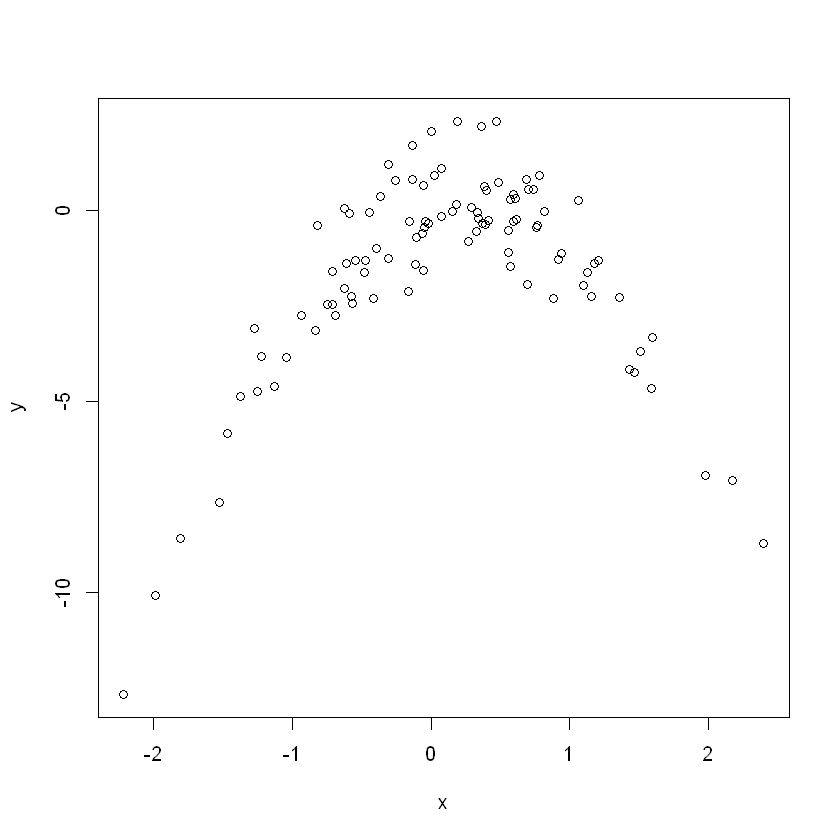

In [83]:
#Part b
plot(x,y)
#There is a curved relationship between x and y according to the scatterplot

In [84]:
#Part c
library(boot)
set.seed(1)
data <- data.frame(x, y)

In [85]:
#Part i
glm_1 <- glm(y ~ x)
cv_error_1 <- cv.glm(data, glm_1)$delta[1]
cv_error_1

[1] 7.288162

In [86]:
#Part ii 
glm_2 <- glm(y ~ poly(x,2))
cv_error_2 <- cv.glm(data, glm_2)$delta[1]
cv_error_2

[1] 0.9374236

In [87]:
#Part iii 
glm_3 <- glm(y ~ poly(x,3))
cv_error_3 <- cv.glm(data, glm_3)$delta[1]
cv_error_3

[1] 0.9566218

In [88]:
#Part iv
glm_4 <- glm(y ~ poly(x,4))
cv_error_4 <- cv.glm(data, glm_4)$delta[1]
cv_error_4

[1] 0.9539049

In [89]:
#Part d
set.seed(123)
data <- data.frame(x, y)

In [90]:
#Part i
glm_1 <- glm(y ~ x)
cv_error_1 <- cv.glm(data, glm_1)$delta[1]
cv_error_1

[1] 7.288162

In [91]:
#Part ii 
glm_2 <- glm(y ~ poly(x,2))
cv_error_2 <- cv.glm(data, glm_2)$delta[1]
cv_error_2

[1] 0.9374236

In [92]:
#Part iii 
glm_3 <- glm(y ~ poly(x,3))
cv_error_3 <- cv.glm(data, glm_3)$delta[1]
cv_error_3

[1] 0.9566218

In [93]:
#Part iv
glm_4 <- glm(y ~ poly(x,4))
cv_error_4 <- cv.glm(data, glm_4)$delta[1]
cv_error_4

[1] 0.9539049

In [94]:
#The results are identical even after changing the random seed since LOOCV evaluates n folds of a single observation

In [95]:
#Part e
#glm_2 had the smallest LOOCV error in part c which makes sense since the scatter plot in part b showed a quadratic relationship
#between x and y, which is the nature of the equation in part c-ii

In [96]:
#Part f
summary(glm_4)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


In [97]:
#The above results show that the p-values are significant for the 1st and 2nd degree models, and insignificant for the 3rd and
#4th degree models. This emphasizes the results from the cross-validation which showed the smallest LOOCV error was for the
#model of the 2nd degree.

### Chapter 6 - Exercise 1

In [98]:
#Part a
#The model with best subset has the smallest training RSS since it considers every possible model with k predictrors. 

In [99]:
#Part b
#It woulnd't be accurate to say one method definitely has the smallest test RSS since the model with the best subset could have 
#the smallest test RSS since it considers every possible model with k predictors, but the other methods could also have the 
#smallest test RSS by luck.

In [100]:
#Part c

#Part i
#True since the model with (k+1) predictors is obtained by adding one additional predictor to the model with k predictors.

#Part ii
#True since the model with k predictors is obtained by removing one predictor from the model with (k+1) predictors.

#Part iii
#False since there is no direct relationship between the models obtained from forward and backward selection.

#Part iv
#False since there is no direct relationship between the models obtained from forward and backward selection

#Part v
#False since the model with (k+1) predictors is obtained by selecting among all possible models with (k+1) predictors, therefore 
#it does not definitely have all the predictors that are selected for the k-variable model.

### Chapter 6 - Exercise 9

In [101]:
library(ISLR)
data(College)
set.seed(1)

In [102]:
#Part a
data_split <- sample(1:nrow(College), nrow(College)/2)
train <- College[data_split,]
test <- College[-data_split,]

In [103]:
#Part b
lm <- lm(Apps ~ ., data = train)
lm_pred <- predict(lm, test)
lm_err <- mean((test$Apps - lm_pred)^2)
lm_err

[1] 1135758

In [104]:
#Part c
library(glmnet)

train_x <- model.matrix(Apps ~ ., data = train)
train_y <- train[, "Apps"]
test_x <- model.matrix(Apps ~ ., data = test)
test_y <- test[, "Apps"]

grid <- 10 ^ seq(4, -2, length = 100)
ridge.mod <- glmnet(train_x, train_y, alpha = 0, lambda = grid, thresh = 1e-12)
lambda.best <- ridge.mod$lambda.min
ridge.pred <- predict(ridge.mod, s = lambda.best, newx = test_x)
ridge.err <- mean((ridge.pred - test_y)^2)
ridge.err

[1] 1164319

In [105]:
#Part d
lasso.mod <- glmnet(train_x, train_y, alpha = 1, lambda = grid, thresh = 1e-12)
lasso.cv <- cv.glmnet(train_x, train_y, alpha = 1, lambda = grid, thresh = 1e-12)
lambda.best <- lasso.cv$lambda.min
lasso.pred <- predict(lasso.mod, s = lambda.best, newx = test_x)
lasso.err <- mean((lasso.pred - test_y)^2)
lasso.err

[1] 1135646

In [106]:
predict(lasso.mod, s = lambda.best, type="coefficients")

19 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -7.900150e+02
(Intercept)  .           
PrivateYes  -3.070140e+02
Accept       1.779318e+00
Enroll      -1.469416e+00
Top10perc    6.672089e+01
Top25perc   -2.230343e+01
F.Undergrad  9.257670e-02
P.Undergrad  9.410220e-03
Outstate    -1.083469e-01
Room.Board   2.115124e-01
Books        2.912111e-01
Personal     6.118433e-03
PhD         -1.547127e+01
Terminal     6.408707e+00
S.F.Ratio    2.282552e+01
perc.alumni  1.130050e+00
Expend       4.856662e-02
Grad.Rate    7.487748e+00

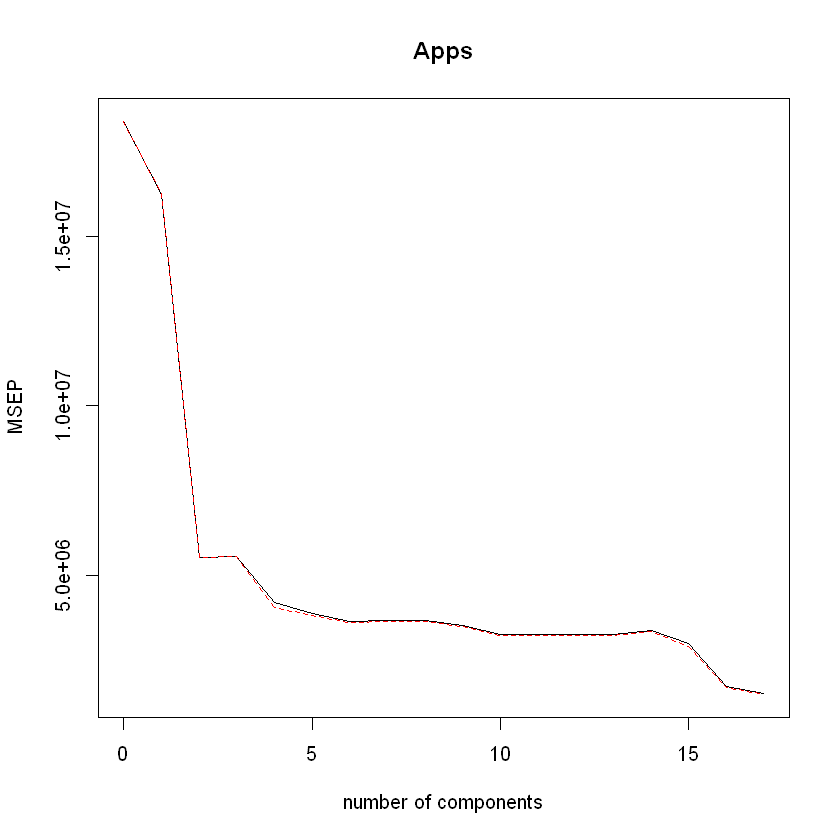

In [107]:
#Part e 
library(pls)

pcr.fit <- pcr(Apps ~ ., data = train, scale = TRUE, validation = "CV")
validationplot(pcr.fit, val.type="MSEP")

In [108]:
pcr.pred <- predict(pcr.fit, test, ncomp=10)
pcr.err <- mean((pcr.pred - test_y)^2)
pcr.err

[1] 1723100

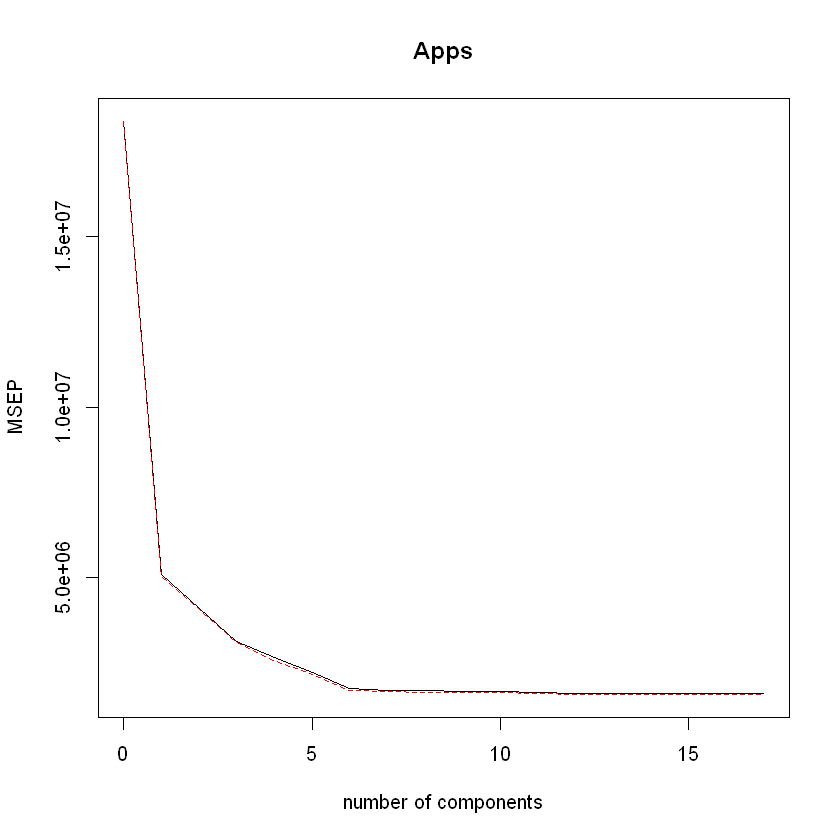

In [109]:
#Part f 
pls.fit <- plsr(Apps ~ ., data = train, scale = TRUE, validation = "CV")
validationplot(pls.fit, val.type = "MSEP")

In [110]:
pls.pred <- predict(pls.fit, test, ncomp = 10)
pls.err <- mean((pls.pred - test_y)^2)
pls.err

[1] 1131661

In [111]:
#Part g
test.avg <- mean(test$Apps)
lm.r2 <- 1 - mean((lm_pred - test$Apps)^2) / mean((test.avg - test$Apps)^2)
ridge.r2 <- 1 - mean((ridge.pred - test$Apps)^2) / mean((test.avg - test$Apps)^2)
lasso.r2 <- 1 - mean((lasso.pred - test$Apps)^2) / mean((test.avg - test$Apps)^2)
pcr.r2 <- 1 - mean((pcr.pred - test$Apps)^2) / mean((test.avg - test$Apps)^2)
pls.r2 <- 1 - mean((pls.pred - test$Apps)^2) / mean((test.avg - test$Apps)^2)

lm.r2
ridge.r2
lasso.r2
pcr.r2
pls.r2

#According to the below results, the PCR model has the lowest accuracy for predicting the college applications, noting that
#there wasn't a big difference among the test error results from the five approaches.

[1] 0.9015413

[1] 0.8990653

[1] 0.901551

[1] 0.8506248

[1] 0.9018965

### Chapter 7 - Exercise 9

In [112]:
#Part a
library(MASS)
data(Boston)

fit <- lm(nox ~ poly(dis, 3), data = Boston)
summary(fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


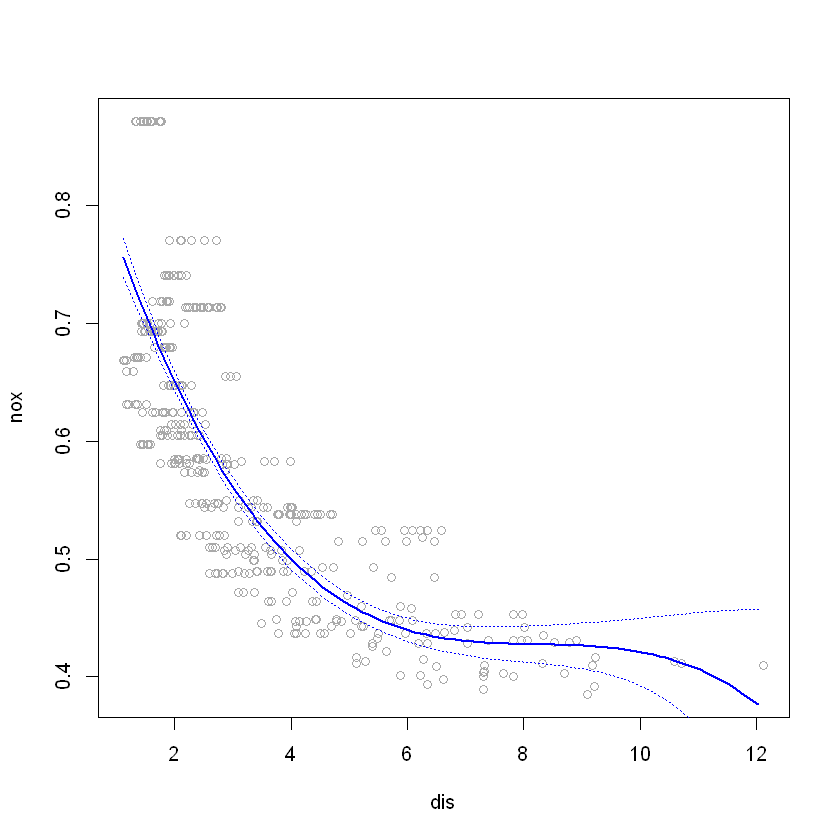

In [113]:
dis.grid <- seq(min(Boston$dis), max(Boston$dis), by = 0.1)
preds <- predict(fit, list(dis = dis.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2*preds$se.fit, preds$fit - 2*preds$se.fit)
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, preds$fit, lwd = 2, col = "blue")
matlines(dis.grid, se.bands, lwd = 1, col = "blue", lty = 3)

In [114]:
#Part b

In [115]:
#Part c

In [116]:
#Part d
library(splines)
fit_splines <- lm(nox ~ bs(dis, df = 4), data = Boston)
summary(fit_splines)
attr(bs(Boston$dis, df = 4), "knots")


Call:
lm(formula = nox ~ bs(dis, df = 4), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124622 -0.039259 -0.008514  0.020850  0.193891 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.73447    0.01460  50.306  < 2e-16 ***
bs(dis, df = 4)1 -0.05810    0.02186  -2.658  0.00812 ** 
bs(dis, df = 4)2 -0.46356    0.02366 -19.596  < 2e-16 ***
bs(dis, df = 4)3 -0.19979    0.04311  -4.634 4.58e-06 ***
bs(dis, df = 4)4 -0.38881    0.04551  -8.544  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06195 on 501 degrees of freedom
Multiple R-squared:  0.7164,	Adjusted R-squared:  0.7142 
F-statistic: 316.5 on 4 and 501 DF,  p-value: < 2.2e-16


50% 
3.20745

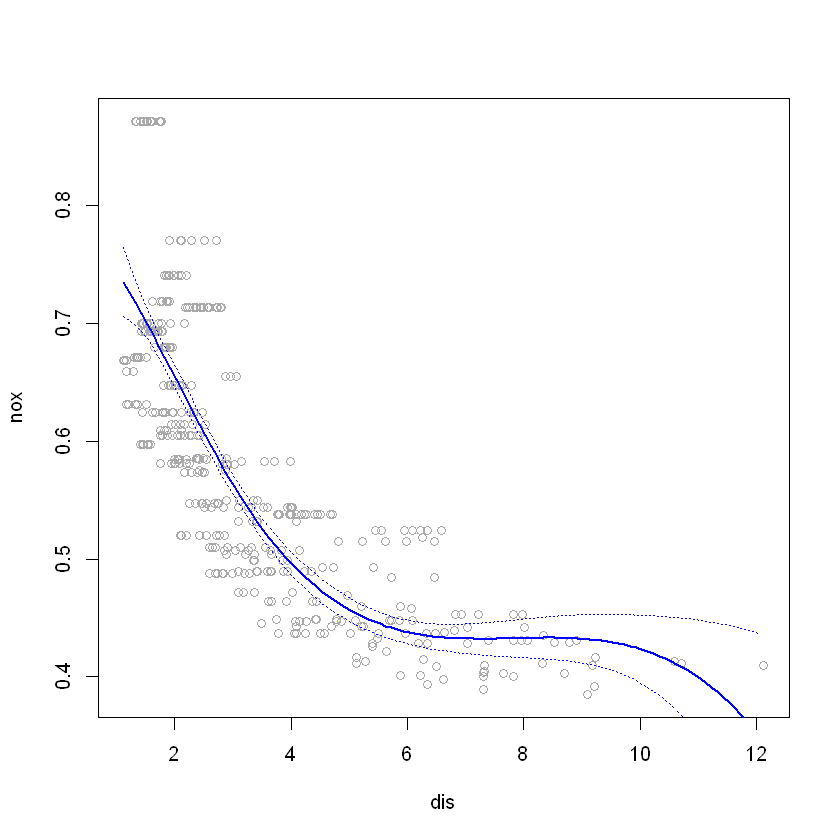

In [117]:
preds <- predict(fit_splines, list(dis = dis.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2*preds$se.fit, preds$fit - 2*preds$se.fit)
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, preds$fit, lwd = 2, col = "blue")
matlines(dis.grid, se.bands, lwd = 1, col = "blue", lty = 3)

In [118]:
#Part e

In [119]:
#Part f 

### Chapter 7 - Exercise 10

In [120]:
#Part a
library(ISLR)
library(leaps)

data_split <- sample(1:nrow(College), nrow(College)/2)
train <- College[data_split,]
test <- College[-data_split,]
fit <- regsubsets(Outstate ~ ., data = train, method = 'forward')
fit.summary <- summary(fit)
fit.summary

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = train, method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 ) " "        " "  " "    " "    " "       " "       " "        
2  ( 1 ) "*"        " "  " "    " "    " "       " "       " "        
3  ( 1

In [121]:
coef(fit, id = 4)

(Intercept)   PrivateYes   Room.Board  perc.alumni       Expend 
-838.4549711 2022.8765700    1.1350888   88.7314452    0.2800035

Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

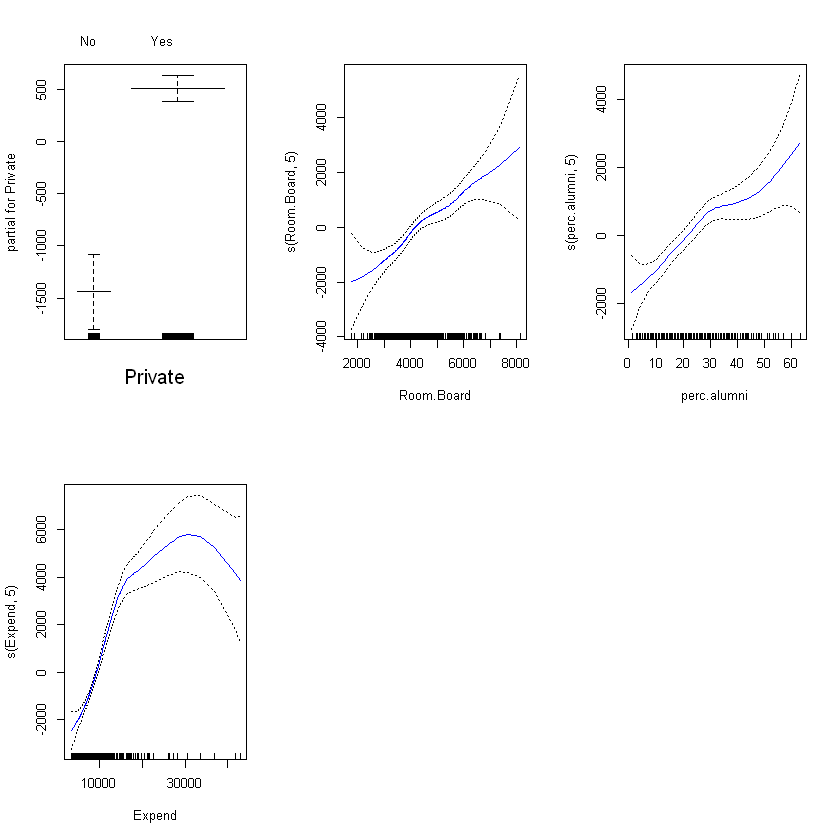

In [122]:
#Part b
library(gam)
gam.mod <- gam(Outstate ~ Private + s(Room.Board, 5) + s(perc.alumni, 5) + s(Expend, 5), data = train)
par(mfrow = c(2,3))
plot(gam.mod, se = TRUE, col = 'blue')

In [123]:
#According to the above plots, Expend has a non-linear relationship with Outstate, where as Room.Board and perc.alumni are
#somewhat linear

In [124]:
#Part c

In [125]:
#Part d
summary(gam.mod)
#The below results show that Expend has a non-linear relationship with Outstate, which is what we saw in Part b.


Call: gam(formula = Outstate ~ Private + s(Room.Board, 5) + s(perc.alumni, 
    5) + s(Expend, 5), data = train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-5324.13 -1142.08    71.36  1248.18  6285.61 

(Dispersion Parameter for gaussian family taken to be 3339375)

    Null Deviance: 5866654684 on 387 degrees of freedom
Residual Deviance: 1238907500 on 370.9998 degrees of freedom
AIC: 6947.975 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                   Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private             1 1499117286 1499117286  448.92 < 2.2e-16 ***
s(Room.Board, 5)    1 1079423051 1079423051  323.24 < 2.2e-16 ***
s(perc.alumni, 5)   1  586011550  586011550  175.49 < 2.2e-16 ***
s(Expend, 5)        1  759963623  759963623  227.58 < 2.2e-16 ***
Residuals         371 1238907500    3339375                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova for Nonparametric Effects
           